In [53]:
# Importamos las librerías necesarias para análisis y visualización

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [54]:
# Cargar el dataset
grupos_df = pd.read_csv('grupos.csv')

/tmp/ipykernel_106983/1357199238.py:2: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  grupos_df = pd.read_csv('grupos.csv')


In [55]:
# ------------------------------------------
# LIMPIEZA DE DATOS
# ------------------------------------------

# Paso 1: Eliminar registros con valores de -1 en columnas clave
# Justificación: Se identificaron valores de -1 en 'ID_CURSO_ACADEMICO', 'ID_SEMESTRE' y 'IND_ALUMNOS_GRUPO_REAL',
# los cuales representan casos aislados y con un impacto mínimo en el conjunto de datos, por lo que se decide eliminarlos.
grupos_df = grupos_df[
    (grupos_df['ID_CURSO_ACADEMICO'] != -1) &
    (grupos_df['ID_SEMESTRE'] != -1) &
    (grupos_df['IND_ALUMNOS_GRUPO_REAL'] != -1)
]

In [56]:
# Paso 2: Imputar valores de 0 en 'IND_HORAS_PREVISTAS' con la mediana
# Justificación: Se observó que alrededor del 10% de los registros tenían '0' en 'IND_HORAS_PREVISTAS', lo que puede ser un error o 
# un valor faltante, dado que la mayoría de las actividades tienen una duración mínima. Usamos la mediana para mantener el balance.
mediana_horas_previstas = grupos_df.loc[grupos_df['IND_HORAS_PREVISTAS'] != 0, 'IND_HORAS_PREVISTAS'].median()
grupos_df['IND_HORAS_PREVISTAS'] = grupos_df['IND_HORAS_PREVISTAS'].replace(0, mediana_horas_previstas)


In [57]:
# Paso 3: Eliminar columna 'ID_DEPARTAMENT_DELEG_DECODA'
# Justificación: Este campo tiene un alto porcentaje de valores especiales (-1 o -2), que representan códigos especiales o 
# datos ausentes en la mayoría de los registros. Para evitar ruido en el análisis, se elimina esta columna.
grupos_df = grupos_df.drop(columns=['ID_DEPARTAMENT_DELEG_DECODA'])

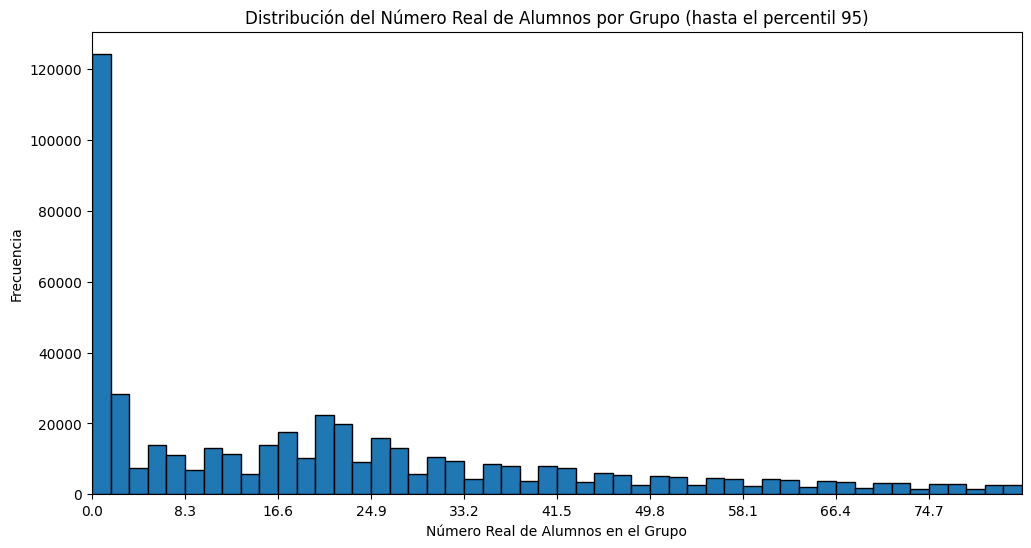

count    515512.000000
mean         25.863799
std          29.768295
min           0.000000
25%           2.000000
50%          19.000000
75%          38.000000
max         822.000000
Name: IND_ALUMNOS_GRUPO_REAL, dtype: float64


In [58]:
# ------------------------------------------
# ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# ------------------------------------------

# Paso 4: Análisis de la distribución del número real de alumnos por grupo ('IND_ALUMNOS_GRUPO_REAL')
# Justificación: Visualizar esta distribución ayuda a entender la estructura de los grupos y la variabilidad en su tamaño,
# lo cual es importante para la asignación de aulas y recursos en el reto de optimización.

# Calculamos el percentil 95 para limitar el eje x
percentil_95 = np.percentile(grupos_df['IND_ALUMNOS_GRUPO_REAL'], 95)

plt.figure(figsize=(12, 6))
plt.hist(grupos_df['IND_ALUMNOS_GRUPO_REAL'], bins=50, edgecolor='black', range=(0, percentil_95))
plt.xlabel('Número Real de Alumnos en el Grupo')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número Real de Alumnos por Grupo (hasta el percentil 95)')

# Ajustamos el eje x para mostrar más detalle en los primeros valores
plt.xlim(0, percentil_95)
plt.xticks(np.arange(0, percentil_95, step=percentil_95/10))

plt.show()

# Mostramos estadísticas descriptivas para complementar la visualización
print(grupos_df['IND_ALUMNOS_GRUPO_REAL'].describe())


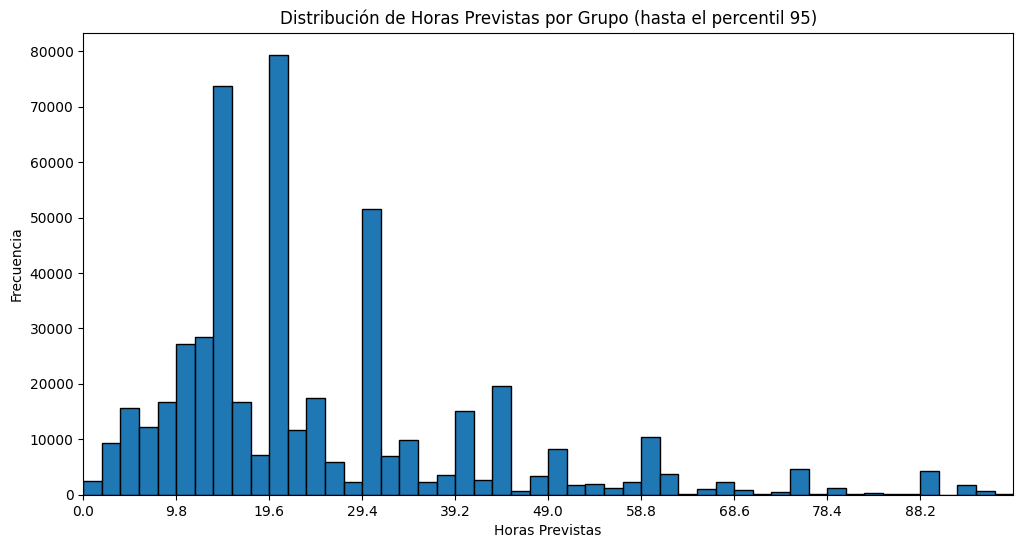

count    515512.000000
mean         37.764794
std          69.265191
min           0.010000
25%          15.000000
50%          21.000000
75%          33.330000
max        9090.000000
Name: IND_HORAS_PREVISTAS, dtype: float64


In [59]:
# Paso 5: Análisis de la distribución de horas previstas por grupo ('IND_HORAS_PREVISTAS')
# Justificación: Visualizar las horas previstas permite identificar actividades cortas y largas, importante para el reto de optimización
# en la planificación de tiempos de ocupación de las aulas.

# Calculamos el percentil 95 para limitar el eje x
percentil_95 = np.percentile(grupos_df['IND_HORAS_PREVISTAS'], 95)

plt.figure(figsize=(12, 6))
plt.hist(grupos_df['IND_HORAS_PREVISTAS'], bins=50, edgecolor='black', range=(0, percentil_95))
plt.xlabel('Horas Previstas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Horas Previstas por Grupo (hasta el percentil 95)')

# Ajustamos el eje x para mostrar más detalle en los primeros valores
plt.xlim(0, percentil_95)
plt.xticks(np.arange(0, percentil_95, step=percentil_95/10))

plt.show()

# Mostramos estadísticas descriptivas para complementar la visualización
print(grupos_df['IND_HORAS_PREVISTAS'].describe())


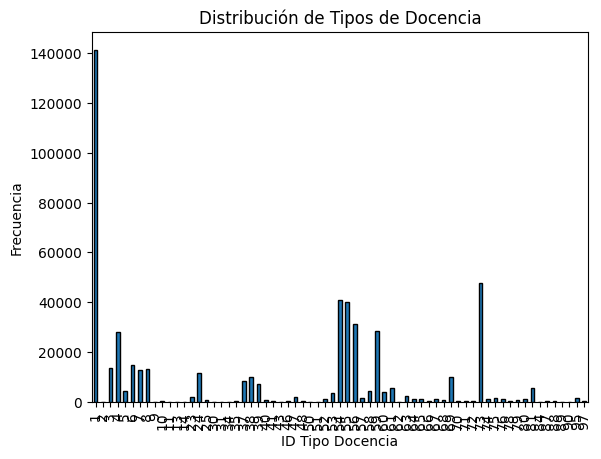

In [60]:
# Paso 6: Análisis de la distribución de tipos de docencia ('ID_TIPO_DOCENCIA')
# Justificación: Identificar la frecuencia de cada tipo de docencia puede revelar patrones en la distribución y ayudar en la
# planificación de tipos de aula y recursos necesarios para cada tipo de docencia.
grupos_df['ID_TIPO_DOCENCIA'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('ID Tipo Docencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tipos de Docencia')
plt.show()

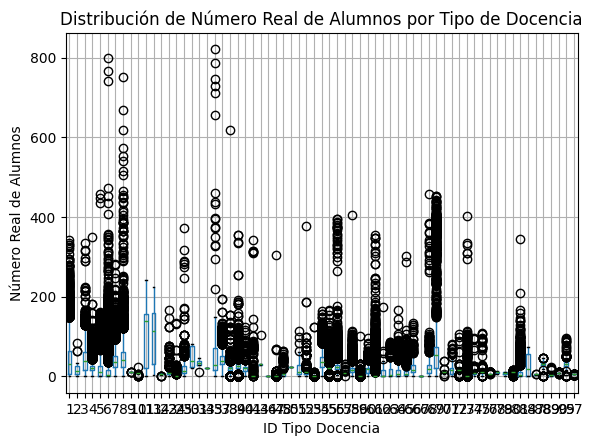

In [61]:
# Paso 7: Relación entre número real de alumnos y tipo de docencia
# Justificación: Este gráfico ayuda a entender si ciertos tipos de docencia tienden a tener grupos más grandes o pequeños,
# información útil para tomar decisiones en la asignación de espacios y en la organización de horarios.
grupos_df.boxplot(column='IND_ALUMNOS_GRUPO_REAL', by='ID_TIPO_DOCENCIA')
plt.xlabel('ID Tipo Docencia')
plt.ylabel('Número Real de Alumnos')
plt.title('Distribución de Número Real de Alumnos por Tipo de Docencia')
plt.suptitle('')  # Quita el título extra que agrega `boxplot`
plt.show()

In [62]:
# ------------------------------------------
# CONCLUSIONES
# ------------------------------------------

# 1. La mayoría de los grupos tienen un tamaño de hasta 50 alumnos, lo que sugiere una estructura con preferencia por grupos pequeños.
# 2. La distribución de horas previstas indica que muchas actividades son de corta duración, especialmente en seminarios o prácticas.
# 3. Existen ciertos tipos de docencia más comunes, probablemente relacionados con clases teóricas o prácticas dominantes en la universidad.
# 4. Los diferentes tipos de docencia muestran una variabilidad en el tamaño de los grupos, lo que sugiere que algunos tipos de docencia
#    pueden estar asociados a grupos más grandes o pequeños, relevante para el reto de optimización en la planificación de aulas.

In [63]:
# Dropping the columns related to language and department as requested
grupos_df = grupos_df.drop(columns=['ID_CENTRO_DEPART', 'ID_IDIOMA', 'IDIOMA_MAJORITARI', 'ID_VALOR_PERIODO_DOC', 'ID_UNIDAD_DOCENTE', 'ID_SEMESTRE'])
grupos_df['ID_PERIODO_DOCENTE'] = pd.Categorical(grupos_df['ID_PERIODO_DOCENTE'])
grupos_df['ID_PERIODO_DOCENTE'] = grupos_df['ID_PERIODO_DOCENTE'].cat.codes

In [64]:
 # Take only ID_CURSO_ACADEMICO=2024
df_2024 = grupos_df[grupos_df['ID_CURSO_ACADEMICO'] == 2024]
df_2024.head()

,ID_GRUPO,ID_CURSO_ACADEMICO,ID_ASIGNATURA,ID_TIPO_DOCENCIA,ID_COD_GRUPO,ID_PERIODO_DOCENTE,IND_ALUMNOS_GRUPO_PREV,IND_ALUMNOS_GRUPO_REAL,IND_HORAS_PREVISTAS
0,2024-0-102-106688-75-104,2024,106688,75,104,1,13,14,8.0
1,2024-0-102-106688-75-118,2024,106688,75,118,1,13,12,8.0
2,2024-0-102-106688-75-119,2024,106688,75,119,1,13,12,8.0
3,2024-0-102-106688-75-121,2024,106688,75,121,1,13,11,8.0
4,2024-0-102-106105-56-101,2024,106105,56,101,1,21,20,21.0


In [65]:
# Save dataset as cleaned grupos
df_2024.to_csv('grupos_cleaned.csv', index=False)